In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data - import the necessary libraries (e.g., Pandas)
# to read your data from a file (e.g., CSV) or a database.

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
# 2. Basic Data Exploration - Check the first few rows of the dataset
# to get an initial sense of the data's structure.

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# 3. Data Summary - Generate descriptive statistics for the data, including mean, median,
# standard deviation, and quartiles, to understand the central tendency and spread of the data.

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#4. Data Information - check the data types of each column,
# the number of non-null values, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# 5. Handling Missing Data - identify and handle missing values using techniques
# like imputation or removal.

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Checking the instances of those missing values in 'bmi' column

nul_data = pd.isnull(df['bmi'])
df[nul_data]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
# There where 201 missing values in bmi.
# Missing values were handled using imputation through inserting the mean of the bmi column

df = df.fillna(df['bmi'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# 6. Feature Engineering (if needed) - is the process of creating new features or
# modifying existing ones to improve the performance of machine learning

# There is no need to modify the existing features of the dataset.

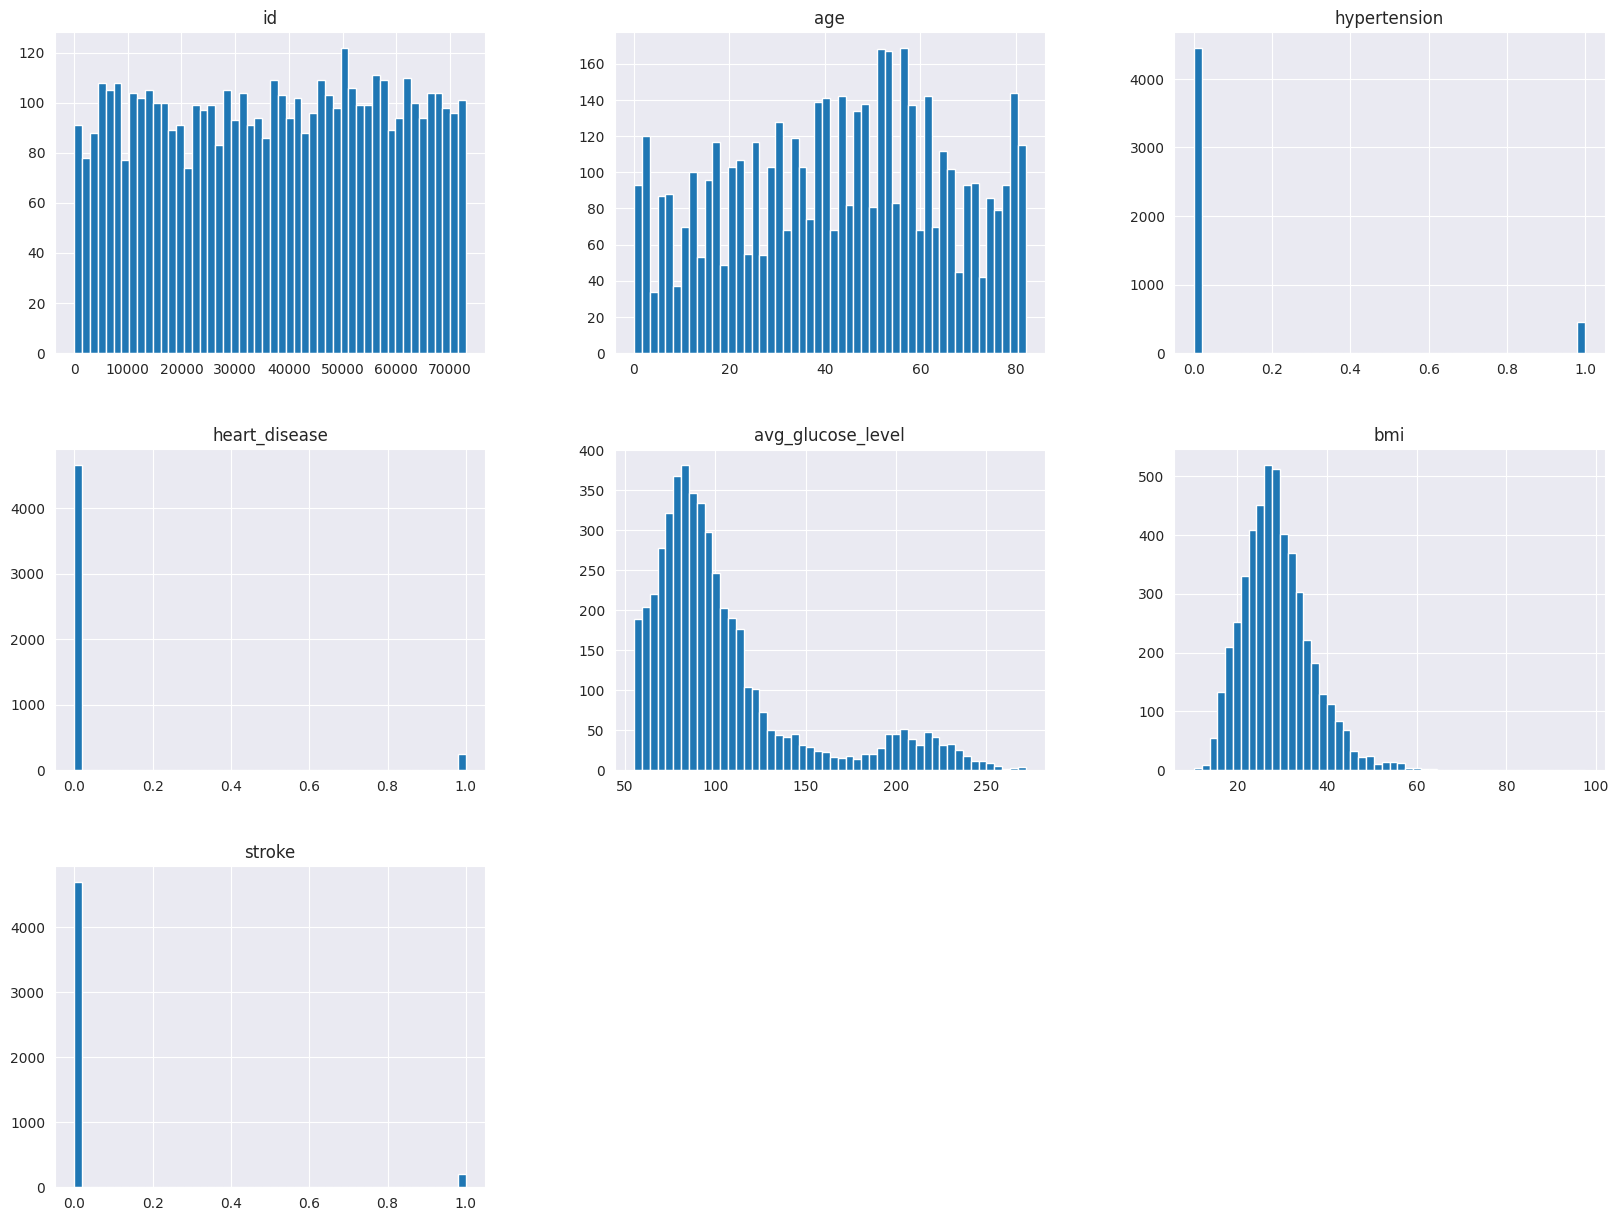

In [ ]:
# 7. Data Visualization - Create visualizations to explore data distributions, relationships, and patterns.
#Use libraries like Matplotlib and Seaborn.

#a. Univariate plots focus on a single variable or feature at a time.
#They are used to visualize the distribution and characteristics of individual variables in isolation.

#Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

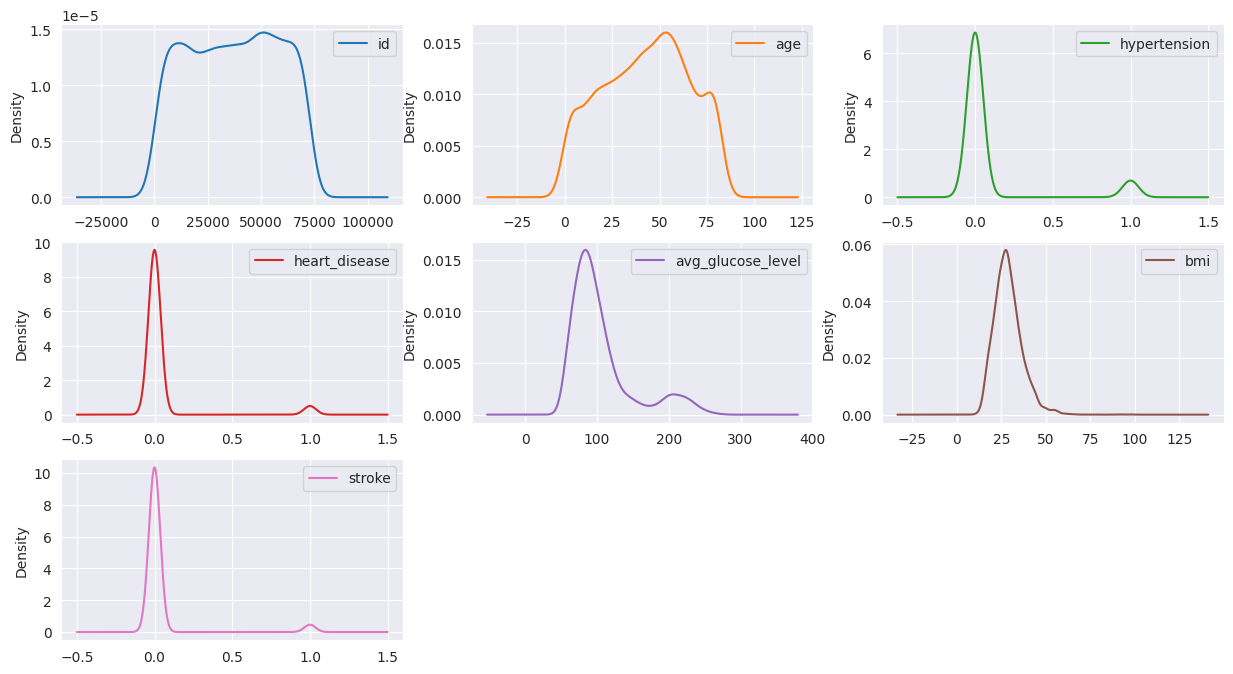

In [ ]:
# Density Plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,8))
plt.show()

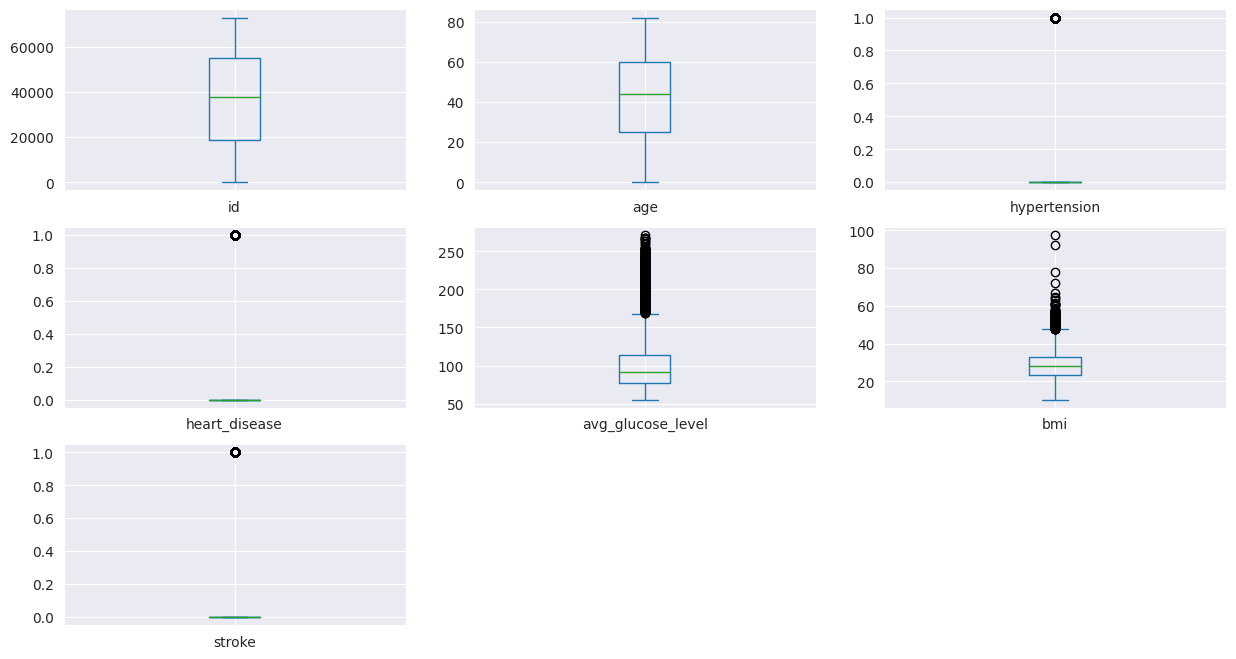

In [ ]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,8))
plt.show()

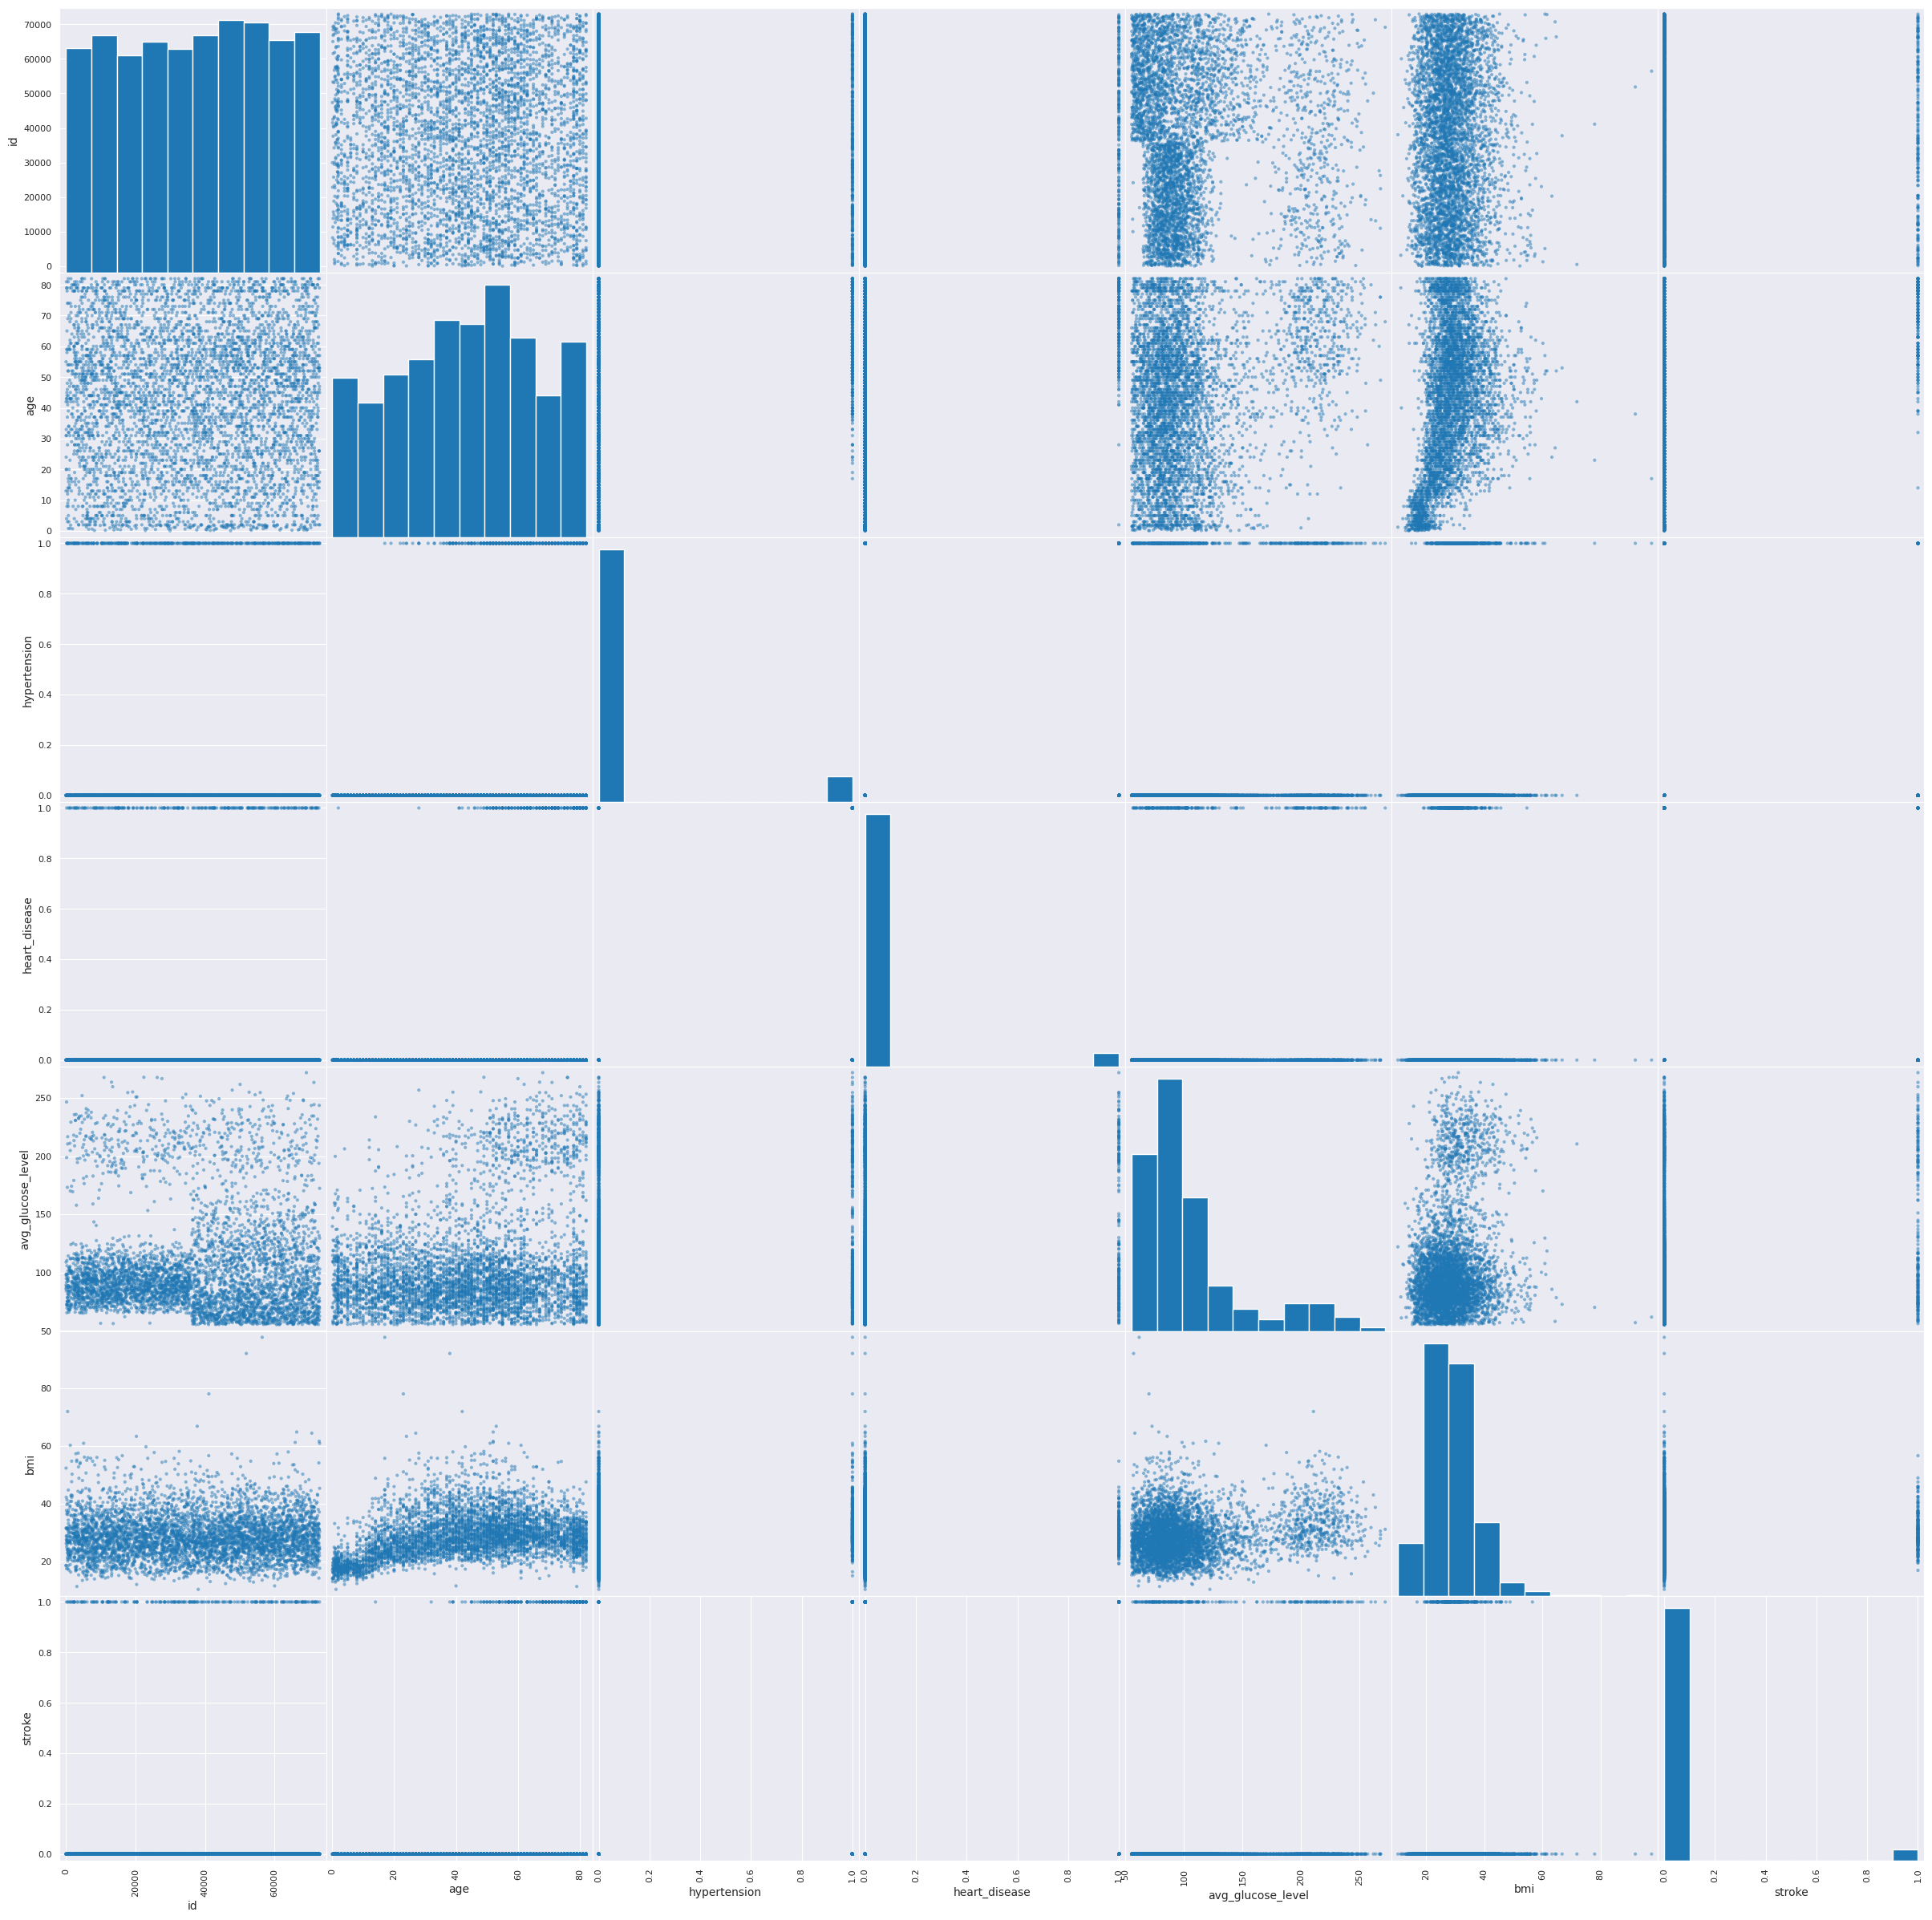

In [ ]:
#b. Multivariate plots involve the simultaneous visualization of two or more variables to explore relationships,
# correlations, and patterns among them.


# First is the Scatter Plot Matrix
# This is a great way to see if there are any trends in the data. It can also spot categorical data patterns with this plot.

pd.plotting.scatter_matrix(df, figsize = [30,30]);
plt.show()

<ipython-input-55-e18f0cf92a45>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stroke_pred = df.drop(['id','stroke'],1)


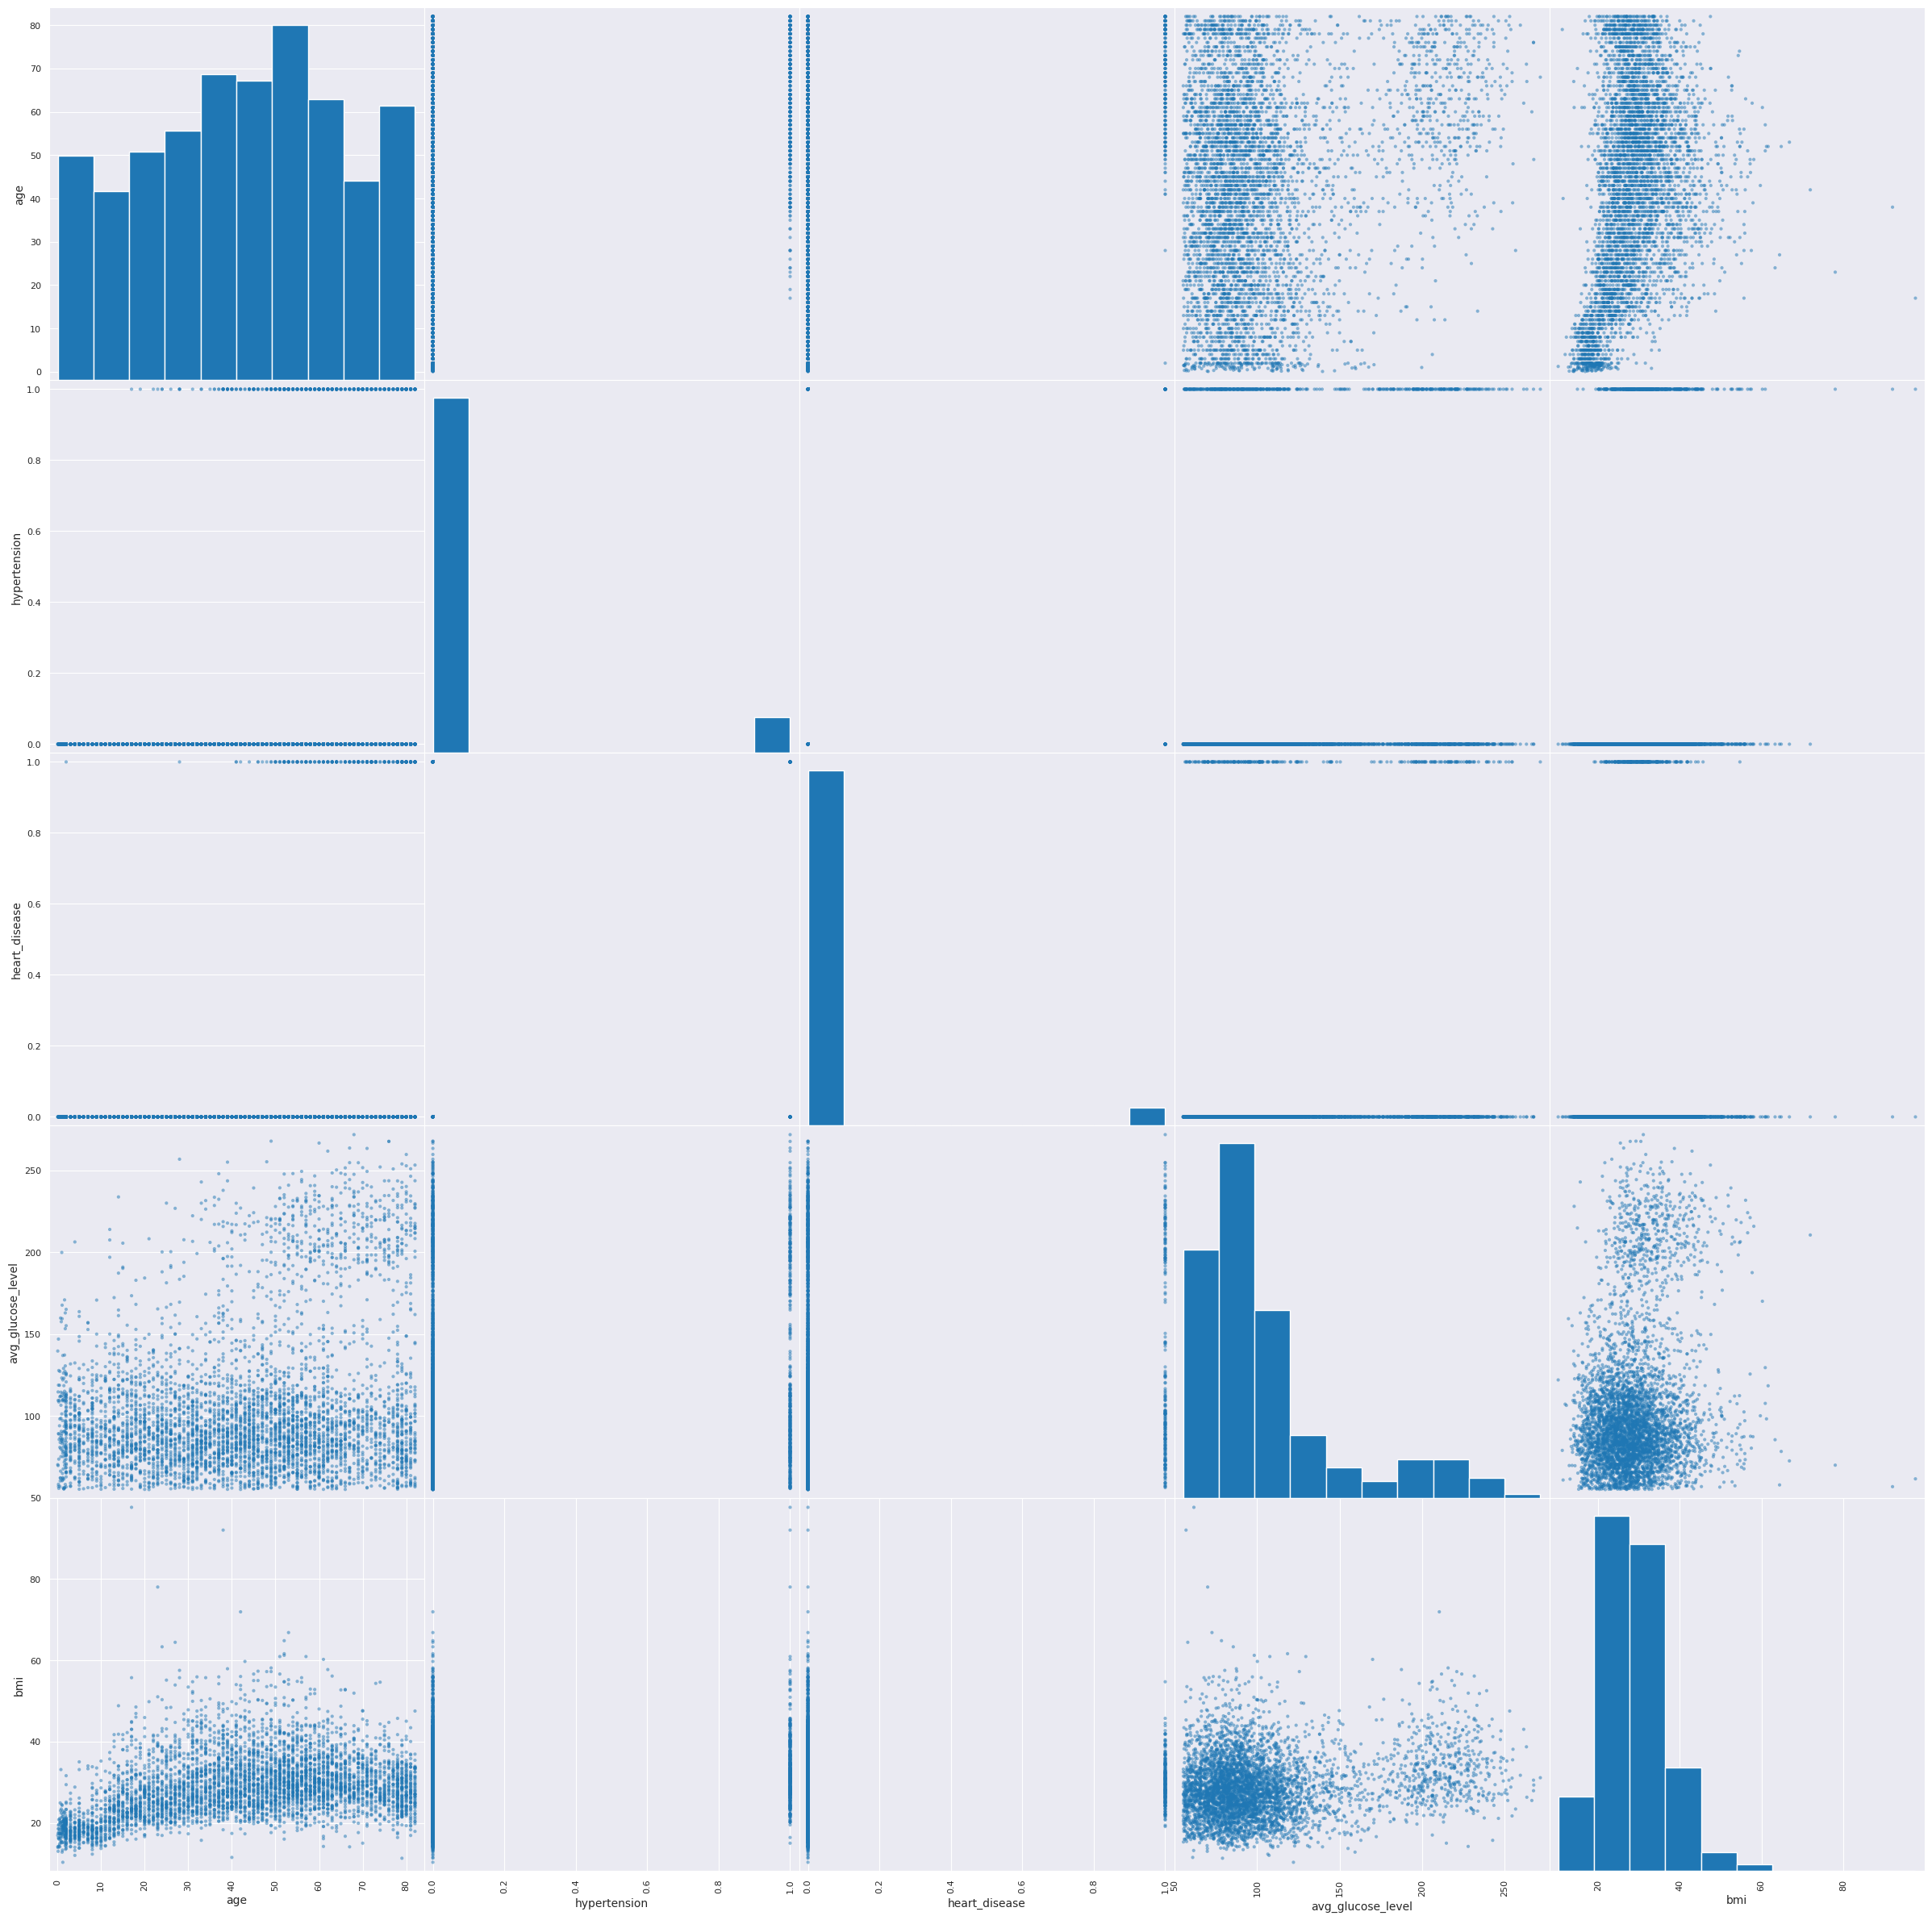

In [ ]:
# Up next is a scatter matrix of all the features compared to the target variable.
# In this case the target variable is having a stroke or not.
# This is the best way to see if there are any clear patterns in the correlation of the features with the target variable.

stroke_pred = df.drop(['id','stroke'],1)
pd.plotting.scatter_matrix(stroke_pred, figsize = [30,30]);
plt.show()

In [ ]:
stroke_pred.corr()

<ipython-input-56-0ff9c9ca9ff6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stroke_pred.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi
age,1.000000,0.274425,0.257123,0.235838,0.333398
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502
bmi,0.333398,0.167811,0.041357,0.175502,1.000000


<ipython-input-57-cce398d2521a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stroke_pred.corr(), center=0);


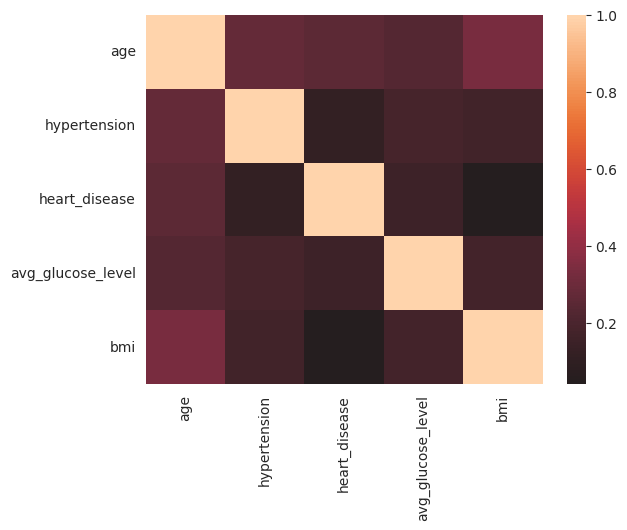

In [ ]:
# Second is the Heatmap
# This is to better visualize the correlation table you can plot it as a heatmap
sns.heatmap(stroke_pred.corr(), center=0);

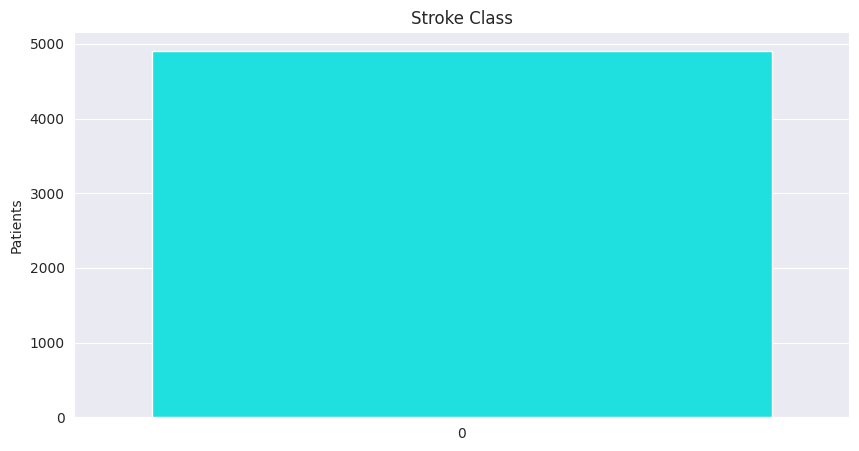

In [ ]:
# Lastly is taking a closer look at the distribution of the target variable.

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['stroke'], alpha = 1, palette= ['cyan','red'])
plt.title('Stroke Class')
plt.ylabel('Patients')
plt.show()

In [ ]:
# 8. Identifying and Handling Outliers (If needed)

# 9. Summary and Insights

First of all, this dataset was retrieved from the open source, *Kaggle.com*. This dataset set inspiration for building machine learning models, particularly on stroke risk classification model. According to Heyman (2019), more than 700,000 people in the US suffer from a stroke each year. There are multiple factors that contribute to someones risk of having a stroke. Understanding a patients potential risk for a stroke may help physicians administer precautionary care.

After conducting a simple Exploratory Data Analysis (EDA), it was examined how the variables such as gender, age, medical histories (hypertension, heart disease, glucose level, bmi), marital status, work type, residence type, and smoking status can be a factor for an individual to have a stroke disease. The stroke column was classified using 1 (for positive) and 0 (for negative). Also, the dataset also contains null values (NaN) which has handled by removing these values because it is only a 0.04% of the whole dataset.

Furthermore, this analysis were aided with different visuals/chart/graphs to understand the data distributions, relationships, and patterns of the cleaned dataset. The use of univariate plots like histogram, density, and box and whisker plots helped to have a focus for each varible at a time. On the other hand, the use of multivariate plots like scatter matrix plots and heatmap helped to identify patterns and compare it using correlations to the target variable. The last graph shows the distribution of the target variable, particularly the stroke class. It shows that there is a huge class imbalance in this dataset.

In [ ]:
# Export csv file
df.to_csv('cleaned_stroke-data.csv', index=False)